Upploading the liblalies and images that we work with.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths
zip_path = "Brain_Data_Organised.zip"
extract_dir = "CT_Images"  # Directory to extract the ZIP file

# Step 1: Extract ZIP file
if not os.path.exists(extract_dir):
    import zipfile
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted files to {extract_dir}")
else:
    print(f"Directory already exists: {extract_dir}")

# Debugging: Print folder structure
print("\nExtracted folder structure:")
for root, dirs, files in os.walk(extract_dir):
    print(f"Directory: {root}")
    for dir_name in dirs:
        print(f"  Subdirectory: {dir_name}")
    for file_name in files:
        print(f"  File: {file_name}")

# Adjust paths based on folder structure
normal_dir = os.path.join(extract_dir, "Brain_Data_Organised/Normal")  # Update if folder is inside a subdirectory
stroke_dir = os.path.join(extract_dir, "Brain_Data_Organised/Stroke")  # Update if folder is inside a subdirectory

if not os.path.exists(normal_dir):
    raise FileNotFoundError(f"Normal directory not found at: {normal_dir}")
if not os.path.exists(stroke_dir):
    raise FileNotFoundError(f"Stroke directory not found at: {stroke_dir}")

# Parameters
image_size = (224, 224)  # Resize images to 224x224
batch_size = 16
num_epochs = 12
num_clusters = 10  # Number of expected clusters/types

# Step 2: Load all images
def load_all_images():
    images = []
    filenames = []

    # Load Normal images
    for filename in os.listdir(normal_dir):
        file_path = os.path.join(normal_dir, filename)
        img = tf.keras.preprocessing.image.load_img(file_path, target_size=image_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
        filenames.append(file_path)

    # Load Stroke images
    for filename in os.listdir(stroke_dir):
        file_path = os.path.join(stroke_dir, filename)
        img = tf.keras.preprocessing.image.load_img(file_path, target_size=image_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
        filenames.append(file_path)

    return np.array(images), filenames

Directory already exists: CT_Images

Extracted folder structure:
Directory: CT_Images
  Subdirectory: Brain_Data_Organised
Directory: CT_Images/Brain_Data_Organised
  Subdirectory: Normal
  Subdirectory: Stroke
Directory: CT_Images/Brain_Data_Organised/Normal
  File: 121 (16).jpg
  File: 95 (1).jpg
  File: 106 (26).jpg
  File: 101 (29).jpg
  File: 98 (19).jpg
  File: 56 (13).jpg
  File: 115 (25).jpg
  File: 110 (3).jpg
  File: 55 (19).jpg
  File: 127 (5).jpg
  File: 126 (29).jpg
  File: 130 (7).jpg
  File: 130 (23).jpg
  File: 119 (2).jpg
  File: 100 (16).jpg
  File: 56 (32).jpg
  File: 120 (24).jpg
  File: 125 (28).jpg
  File: 116 (16).jpg
  File: 126 (23).jpg
  File: 129 (9).jpg
  File: 61 (18).jpg
  File: 49 (30).jpg
  File: 119 (14).jpg
  File: 102 (12).jpg
  File: 127 (31).jpg
  File: 53 (3).jpg
  File: 63 (14).jpg
  File: 59 (10).jpg
  File: 111 (19).jpg
  File: 60 (26).jpg
  File: 113 (15).jpg
  File: 130 (12).jpg
  File: 49 (15).jpg
  File: 106 (10).jpg
  File: 63 (10).jpg
  Fi

# First model- three parts

1.ResNet50- A pretrained ResNet50 model, trained on ImageNet, is used to extract key patterns from images. Its final classification step is skipped, and the features are summarized using global average pooling.

2.KMens- This is unsupervized model. The KMeans clustering algorithm is applied to the extracted features to group images into clusters.

3.Custom Sequential CNN- Designed and trained for binary classification (Normal vs. Stroke) for each cluster.

157/157 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step


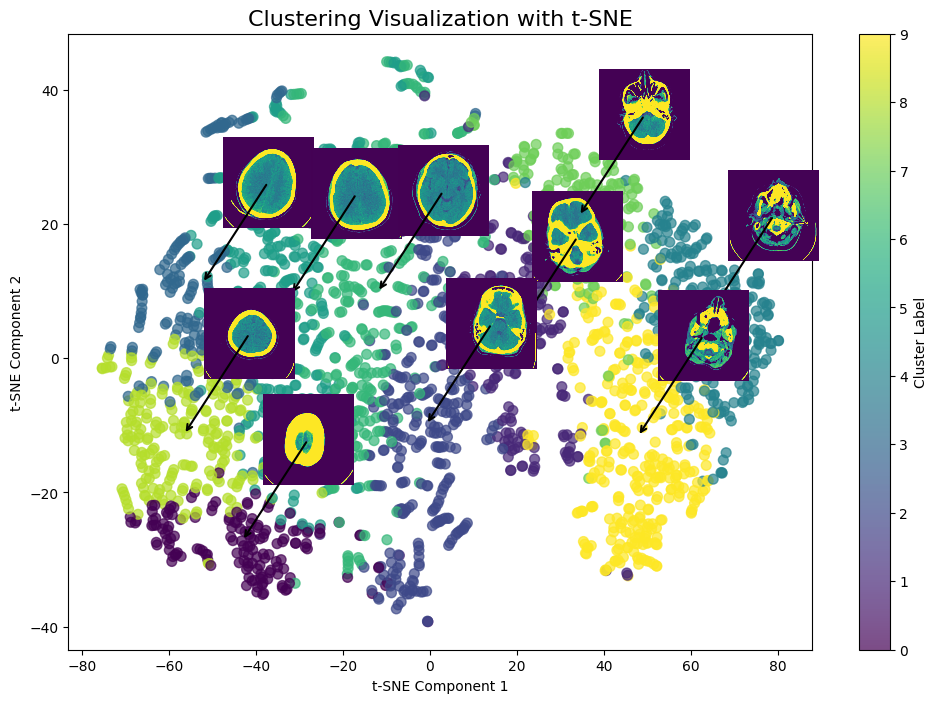

Displaying 5 images for Cluster 6


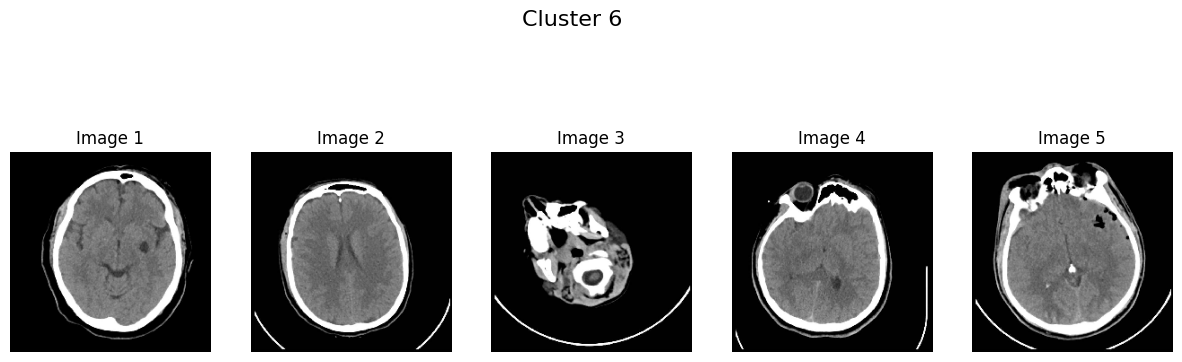

Displaying 5 images for Cluster 9


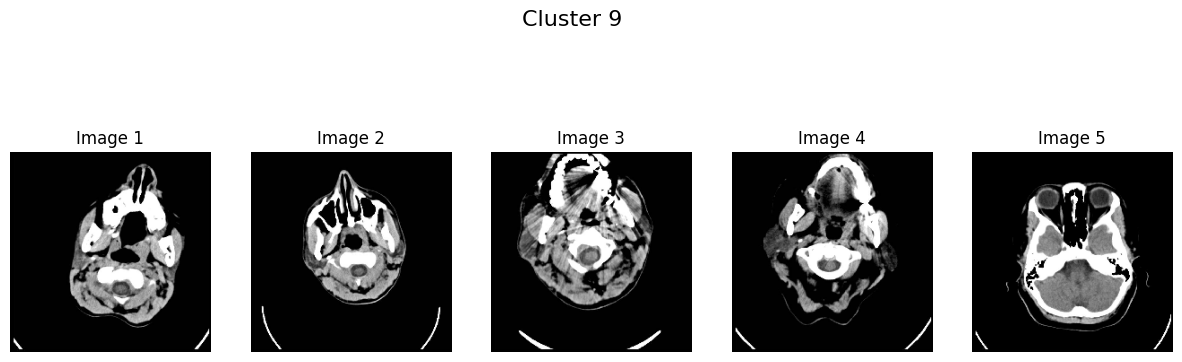

Displaying 5 images for Cluster 8


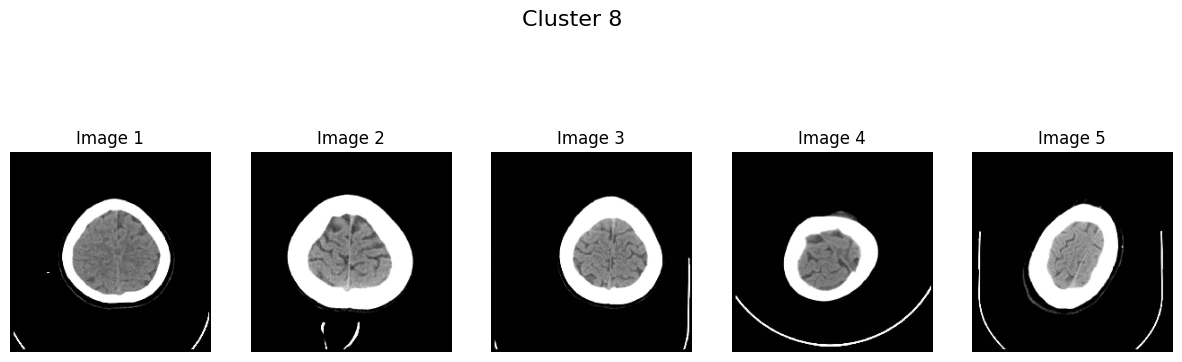

Displaying 5 images for Cluster 5


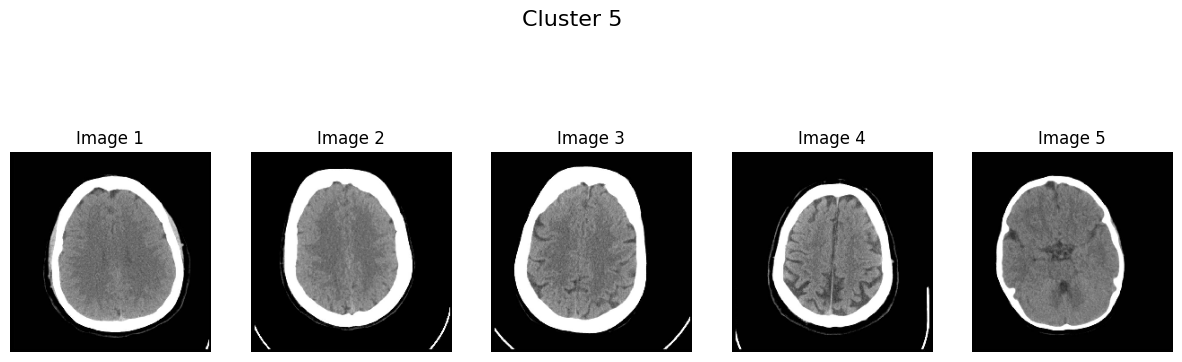

Displaying 5 images for Cluster 7


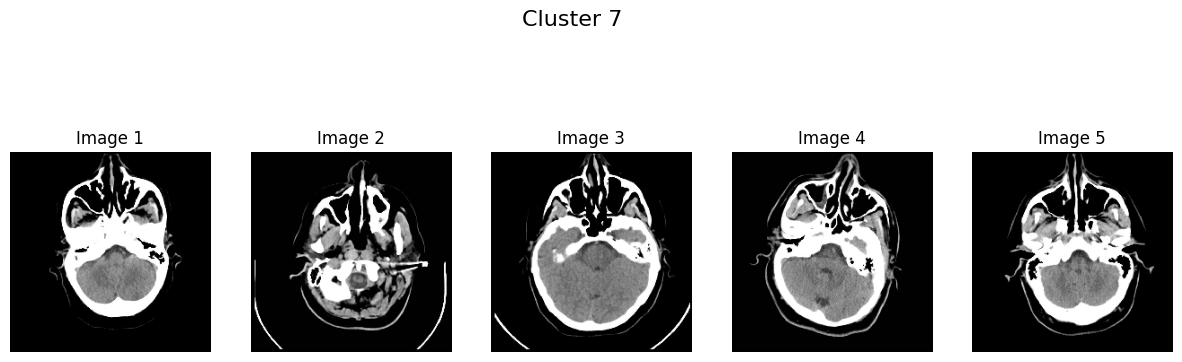

Displaying 5 images for Cluster 0


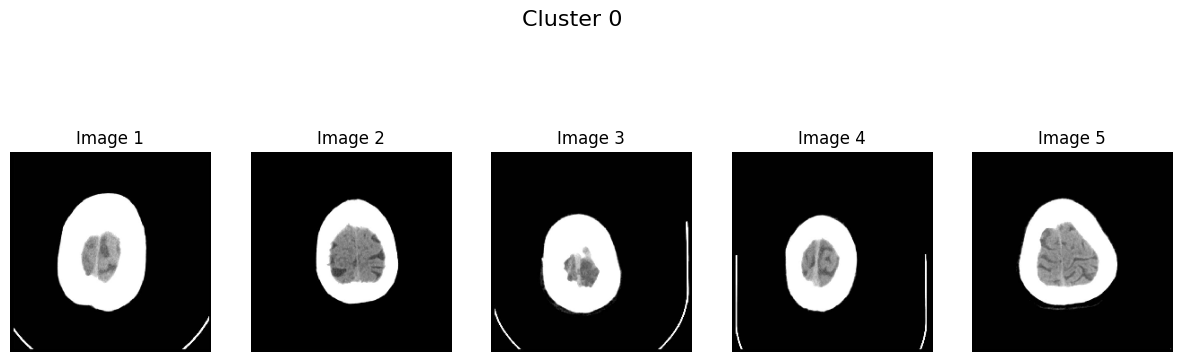

Displaying 5 images for Cluster 2


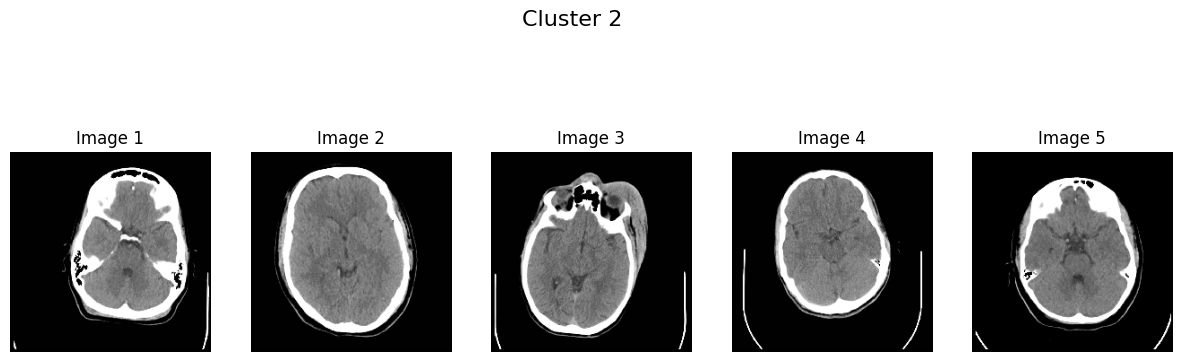

Displaying 5 images for Cluster 3


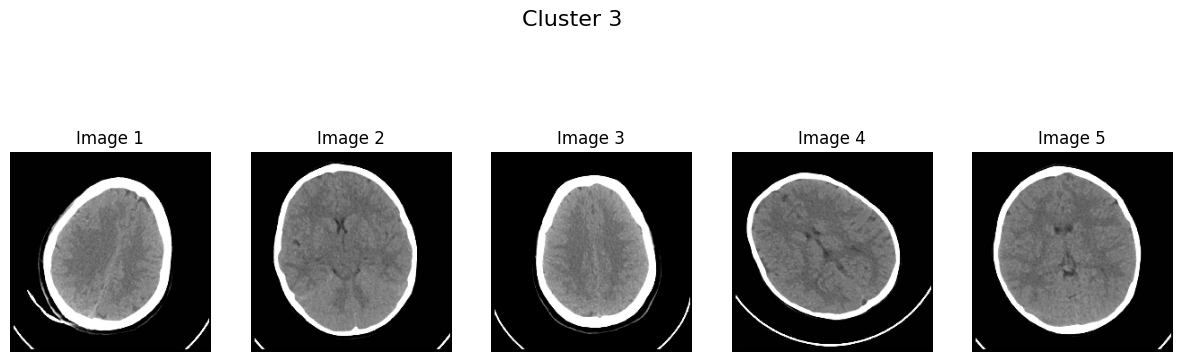

Displaying 5 images for Cluster 1


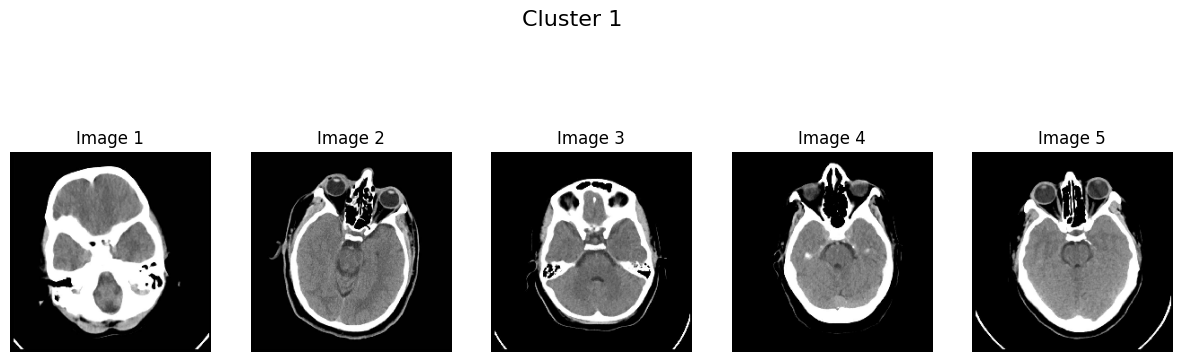

Displaying 5 images for Cluster 4


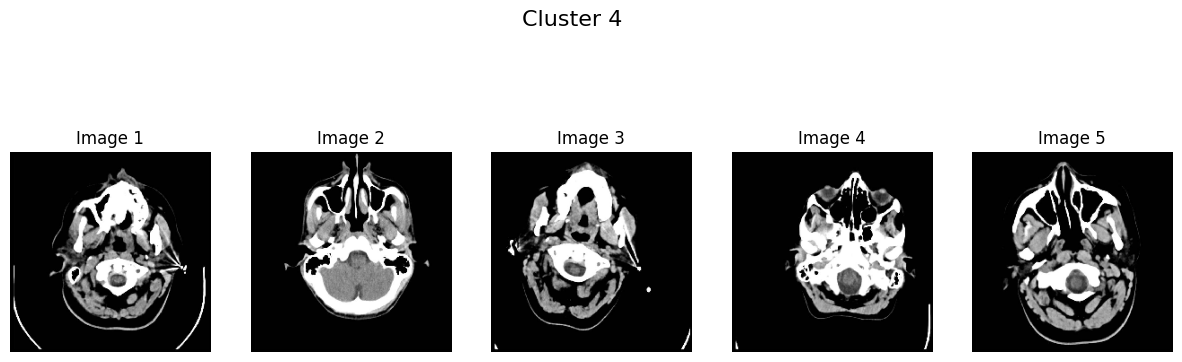

Processing Cluster 6 with 318 images...
Cluster 6 Train Data: 174 Non-Stroke, 80 Stroke
Cluster 6 Test Data: 52 Non-Stroke, 12 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6403 - loss: 4.1026 - val_accuracy: 0.9062 - val_loss: 3.4861
Epoch 2/12
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.7469 - loss: 3.5219 - val_accuracy: 0.4062 - val_loss: 3.6029
Epoch 3/12
16/16 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8375 - loss: 3.2452 - val_accuracy: 0.1875 - val_loss: 3.7601
Epoch 4/12
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9062 - loss: 3.0451 - val_accuracy: 0.1875 - val_loss: 3.7001
Epoch 5/12
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9126 - loss: 2.8827 - val_accuracy: 0.1875 - val_loss: 3.7713
Epoch 6/12
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8911 - loss: 2.8321 - val_accuracy: 0.1875 - val_loss: 3.9990
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step


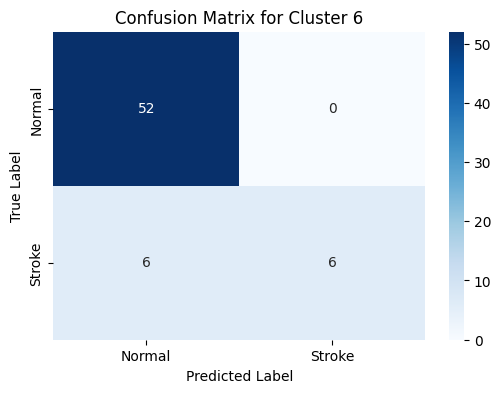

Cluster 6 Metrics:
 - Accuracy: 0.9062
 - Precision: 1.0000
 - Recall: 0.5000
 - F1 Score: 0.6667
 - AUC: 0.7837
Processing Cluster 9 with 361 images...
Cluster 9 Train Data: 167 Non-Stroke, 121 Stroke
Cluster 9 Test Data: 45 Non-Stroke, 28 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6109 - loss: 3.9740 - val_accuracy: 0.4384 - val_loss: 3.7646
Epoch 2/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.8522 - loss: 3.3880 - val_accuracy: 0.4932 - val_loss: 3.5407
Epoch 3/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9218 - loss: 3.0397 - val_accuracy: 0.6301 - val_loss: 3.3992
Epoch 4/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9737 - loss: 2.8387 - val_accuracy: 0.4795 - val_loss: 3.3512
Epoch 5/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9827 - loss: 2.7229 - val_accuracy: 0.3836 - val_loss: 3.4502
Epoch 6/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9990 - loss: 2.5751 - val_accuracy: 0.3836 - val_loss: 3.3601
Epoch 7/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9904 - loss: 2.4867 - val_accuracy: 0.4247 - val_loss: 3.0746
Epoch 8/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9867 - loss: 2.3969 - val_accuracy: 0.8356 - val_loss:

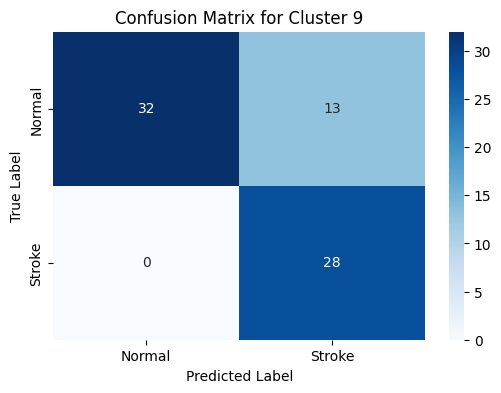

Cluster 9 Metrics:
 - Accuracy: 0.8219
 - Precision: 0.6829
 - Recall: 1.0000
 - F1 Score: 0.8116
 - AUC: 0.9635
Processing Cluster 8 with 218 images...
Cluster 8 Train Data: 117 Non-Stroke, 57 Stroke
Cluster 8 Test Data: 22 Non-Stroke, 22 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5709 - loss: 4.1564 - val_accuracy: 0.5909 - val_loss: 3.6347
Epoch 2/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7660 - loss: 3.4812 - val_accuracy: 0.6818 - val_loss: 3.5753
Epoch 3/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7797 - loss: 3.3419 - val_accuracy: 0.7045 - val_loss: 3.5062
Epoch 4/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9092 - loss: 3.1337 - val_accuracy: 0.5000 - val_loss: 3.4916
Epoch 5/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9177 - loss: 3.0082 - val_accuracy: 0.5682 - val_loss: 3.3808
Epoch 6/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8982 - loss: 2.9633 - val_accuracy: 0.5000 - val_loss: 3.3966
Epoch 7/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8379 - loss: 2.9493 - val_accuracy: 0.5000 - val_loss: 3.3258
Epoch 8/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9416 - loss: 2.7609 - val_accuracy: 0.5000 - val_loss:

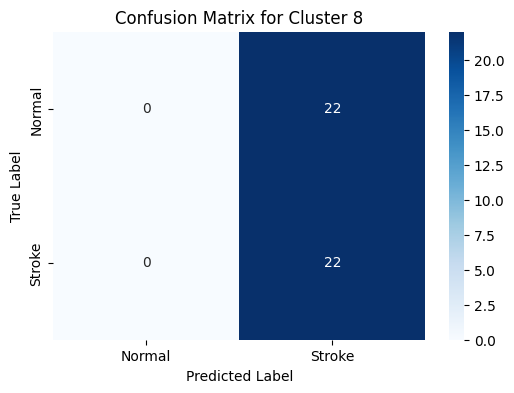

Cluster 8 Metrics:
 - Accuracy: 0.5000
 - Precision: 0.5000
 - Recall: 1.0000
 - F1 Score: 0.6667
 - AUC: 0.8264
Processing Cluster 5 with 328 images...
Cluster 5 Train Data: 174 Non-Stroke, 88 Stroke
Cluster 5 Test Data: 45 Non-Stroke, 21 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5604 - loss: 4.3276 - val_accuracy: 0.6970 - val_loss: 3.5590
Epoch 2/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8821 - loss: 3.3039 - val_accuracy: 0.9091 - val_loss: 3.5291
Epoch 3/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9328 - loss: 3.1344 - val_accuracy: 0.4091 - val_loss: 3.5445
Epoch 4/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9490 - loss: 2.9886 - val_accuracy: 0.3485 - val_loss: 3.6195
Epoch 5/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9586 - loss: 2.8993 - val_accuracy: 0.3182 - val_loss: 3.6675
Epoch 6/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9940 - loss: 2.7812 - val_accuracy: 0.3182 - val_loss: 3.6947
Epoch 7/12
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9799 - loss: 2.6824 - val_accuracy: 0.3182 - val_loss: 3.7168
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step


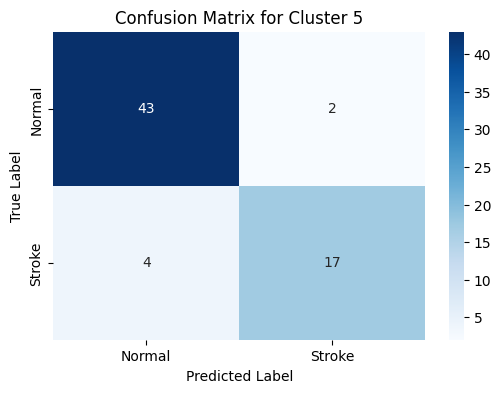

Cluster 5 Metrics:
 - Accuracy: 0.9091
 - Precision: 0.8947
 - Recall: 0.8095
 - F1 Score: 0.8500
 - AUC: 0.9302
Processing Cluster 7 with 192 images...
Cluster 7 Train Data: 114 Non-Stroke, 39 Stroke
Cluster 7 Test Data: 30 Non-Stroke, 9 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5785 - loss: 4.1331 - val_accuracy: 0.7179 - val_loss: 3.6534
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8703 - loss: 3.3399 - val_accuracy: 0.8462 - val_loss: 3.5164
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9535 - loss: 3.1746 - val_accuracy: 0.8718 - val_loss: 3.4803
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9635 - loss: 3.0655 - val_accuracy: 0.8974 - val_loss: 3.4557
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9870 - loss: 2.9800 - val_accuracy: 0.8718 - val_loss: 3.3599
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9697 - loss: 2.9469 - val_accuracy: 0.9231 - val_loss: 3.2649
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9772 - loss: 2.8457 - val_accuracy: 0.8718 - val_loss: 3.2649
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9787 - loss: 2.8025 - val_accuracy: 0.7949 - val_loss:

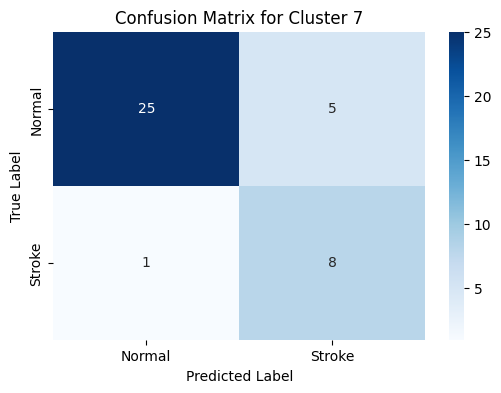

Cluster 7 Metrics:
 - Accuracy: 0.8462
 - Precision: 0.6154
 - Recall: 0.8889
 - F1 Score: 0.7273
 - AUC: 0.9667
Processing Cluster 0 with 156 images...
Cluster 0 Train Data: 75 Non-Stroke, 49 Stroke
Cluster 0 Test Data: 18 Non-Stroke, 14 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5817 - loss: 4.0650 - val_accuracy: 0.5312 - val_loss: 3.7446
Epoch 2/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6594 - loss: 3.7818 - val_accuracy: 0.4062 - val_loss: 3.7090
Epoch 3/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8299 - loss: 3.3152 - val_accuracy: 0.4688 - val_loss: 3.6609
Epoch 4/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7981 - loss: 3.3227 - val_accuracy: 0.4375 - val_loss: 3.8372
Epoch 5/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8823 - loss: 3.1211 - val_accuracy: 0.4375 - val_loss: 4.1110
Epoch 6/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9105 - loss: 3.0562 - val_accuracy: 0.4375 - val_loss: 4.4355
Epoch 7/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9104 - loss: 2.9629 - val_accuracy: 0.4375 - val_loss: 4.8875
Epoch 8/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9113 - loss: 2.9340 - val_accuracy: 0.4375 - val_loss: 4.9542
1/1 ━━━━

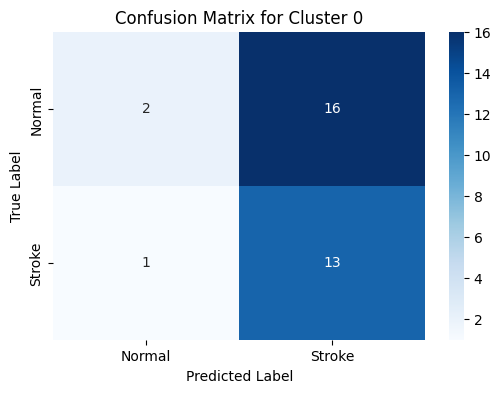

Cluster 0 Metrics:
 - Accuracy: 0.4688
 - Precision: 0.4483
 - Recall: 0.9286
 - F1 Score: 0.6047
 - AUC: 0.7421
Processing Cluster 2 with 297 images...
Cluster 2 Train Data: 108 Non-Stroke, 129 Stroke
Cluster 2 Test Data: 30 Non-Stroke, 30 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5914 - loss: 4.0406 - val_accuracy: 0.6000 - val_loss: 3.6987
Epoch 2/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8757 - loss: 3.3715 - val_accuracy: 0.5000 - val_loss: 4.0466
Epoch 3/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9287 - loss: 3.1515 - val_accuracy: 0.5000 - val_loss: 4.3077
Epoch 4/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9788 - loss: 2.9395 - val_accuracy: 0.5000 - val_loss: 4.4327
Epoch 5/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9643 - loss: 2.8490 - val_accuracy: 0.5000 - val_loss: 4.7547
Epoch 6/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9717 - loss: 2.7390 - val_accuracy: 0.5000 - val_loss: 5.0105
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


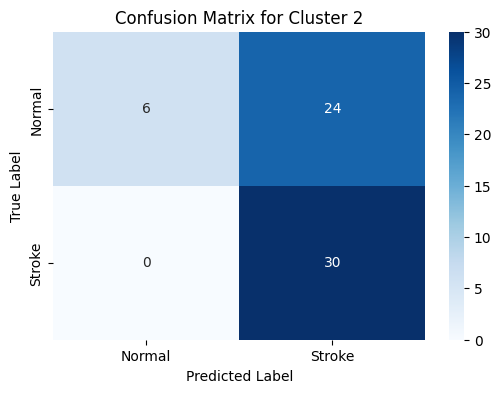

Cluster 2 Metrics:
 - Accuracy: 0.6000
 - Precision: 0.5556
 - Recall: 1.0000
 - F1 Score: 0.7143
 - AUC: 0.7678
Processing Cluster 3 with 172 images...
Cluster 3 Train Data: 90 Non-Stroke, 47 Stroke
Cluster 3 Test Data: 21 Non-Stroke, 14 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6403 - loss: 4.2372 - val_accuracy: 0.6286 - val_loss: 3.6446
Epoch 2/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8719 - loss: 3.3445 - val_accuracy: 0.7429 - val_loss: 3.5021
Epoch 3/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9176 - loss: 3.1878 - val_accuracy: 0.7143 - val_loss: 3.4311
Epoch 4/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8643 - loss: 3.1984 - val_accuracy: 0.8571 - val_loss: 3.3651
Epoch 5/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9599 - loss: 3.0273 - val_accuracy: 0.9143 - val_loss: 3.3274
Epoch 6/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9494 - loss: 2.9389 - val_accuracy: 0.9429 - val_loss: 3.2955
Epoch 7/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9774 - loss: 2.8447 - val_accuracy: 0.6000 - val_loss: 3.3244
Epoch 8/12
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9754 - loss: 2.8366 - val_accuracy: 0.4000 - val_loss: 3.5003
Epoch 9/

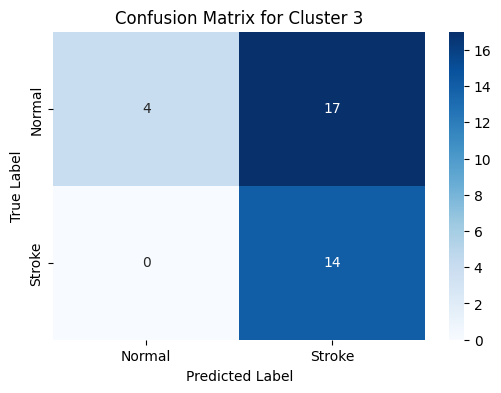

Cluster 3 Metrics:
 - Accuracy: 0.5143
 - Precision: 0.4516
 - Recall: 1.0000
 - F1 Score: 0.6222
 - AUC: 0.9694
Processing Cluster 1 with 207 images...
Cluster 1 Train Data: 98 Non-Stroke, 67 Stroke
Cluster 1 Test Data: 21 Non-Stroke, 21 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6498 - loss: 3.9843 - val_accuracy: 0.7143 - val_loss: 3.6350
Epoch 2/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8887 - loss: 3.2853 - val_accuracy: 0.5000 - val_loss: 3.7131
Epoch 3/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9455 - loss: 3.1225 - val_accuracy: 0.5000 - val_loss: 3.7931
Epoch 4/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9651 - loss: 3.0084 - val_accuracy: 0.5000 - val_loss: 4.0020
Epoch 5/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9723 - loss: 2.9355 - val_accuracy: 0.5000 - val_loss: 4.0039
Epoch 6/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9704 - loss: 2.8506 - val_accuracy: 0.5000 - val_loss: 4.1168
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step


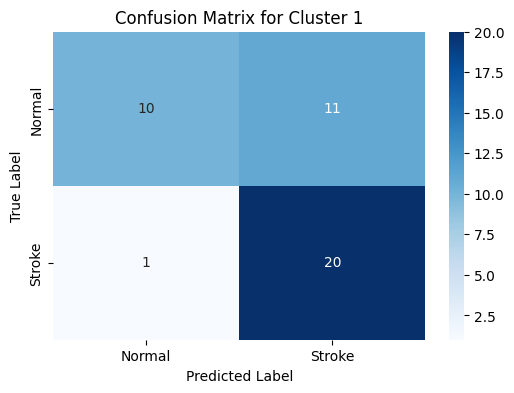

Cluster 1 Metrics:
 - Accuracy: 0.7143
 - Precision: 0.6452
 - Recall: 0.9524
 - F1 Score: 0.7692
 - AUC: 0.8413
Processing Cluster 4 with 252 images...
Cluster 4 Train Data: 118 Non-Stroke, 83 Stroke
Cluster 4 Test Data: 32 Non-Stroke, 19 Stroke


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5905 - loss: 4.1519 - val_accuracy: 0.6863 - val_loss: 3.5656
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9435 - loss: 3.1940 - val_accuracy: 0.4314 - val_loss: 3.7034
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9487 - loss: 3.0905 - val_accuracy: 0.4118 - val_loss: 3.6605
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9906 - loss: 2.9106 - val_accuracy: 0.3725 - val_loss: 3.7318
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 1.0000 - loss: 2.8195 - val_accuracy: 0.3725 - val_loss: 3.7072
Epoch 6/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9947 - loss: 2.7593 - val_accuracy: 0.3725 - val_loss: 3.7522
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


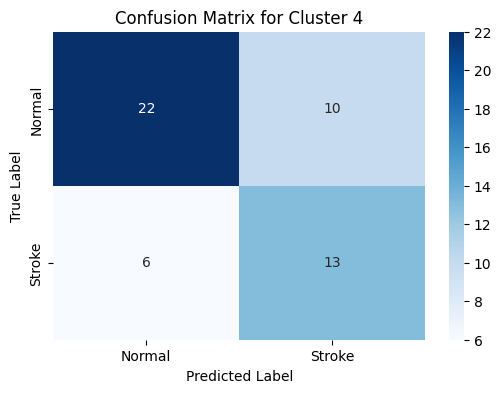

Cluster 4 Metrics:
 - Accuracy: 0.6863
 - Precision: 0.5652
 - Recall: 0.6842
 - F1 Score: 0.6190
 - AUC: 0.7911

Test Data Summary:
                                                File  Cluster  Class
0  CT_Images/Brain_Data_Organised/Normal/121 (16)...        6      0
1  CT_Images/Brain_Data_Organised/Normal/55 (19).jpg        6      1
2  CT_Images/Brain_Data_Organised/Normal/127 (5).jpg        6      0
3  CT_Images/Brain_Data_Organised/Normal/125 (28)...        6      1
4  CT_Images/Brain_Data_Organised/Normal/49 (30).jpg        6      0

Final Results:
Cluster 6 Metrics:
 - Accuracy: 0.9062
 - Precision: 1.0000
 - Recall: 0.5000
 - F1 Score: 0.6667
 - AUC: 0.7837
Cluster 9 Metrics:
 - Accuracy: 0.8219
 - Precision: 0.6829
 - Recall: 1.0000
 - F1 Score: 0.8116
 - AUC: 0.9635
Cluster 8 Metrics:
 - Accuracy: 0.5000
 - Precision: 0.5000
 - Recall: 1.0000
 - F1 Score: 0.6667
 - AUC: 0.8264
Cluster 5 Metrics:
 - Accuracy: 0.9091
 - Precision: 0.8947
 - Recall: 0.8095
 - F1 Score: 0.8500


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import pandas as pd

# Step 3: Extract features using a pretrained model
def extract_features(images):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    feature_model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))
    features = feature_model.predict(images, batch_size=batch_size)
    return features

# Step 4: Cluster images into types/cuts
def cluster_images(features, filenames):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    clustered_images = defaultdict(list)

    for filename, cluster_id in zip(filenames, cluster_labels):
        clustered_images[cluster_id].append(filename)

    return clustered_images, cluster_labels

# Step 5: Train a stroke prediction model for each cluster with additional metrics
def stroke_prediction_per_cluster_with_confusion(clustered_images):
    results = {}
    test_labels_df = []  # List to store test data information

    for cluster_id, image_paths in clustered_images.items():
        print(f"Processing Cluster {cluster_id} with {len(image_paths)} images...")
        if len(image_paths) < 10:  # Skip clusters with insufficient data
            print(f"Cluster {cluster_id} has insufficient data. Skipping...")
            continue

        # Load images and assign labels (Normal: 0, Stroke: 1)
        images = []
        labels = []

        for path in image_paths:
            img = load_img(path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)

            if "Normal" in path:
                labels.append(0)
            else:
                labels.append(1)

        X = np.array(images)
        y = np.array(labels)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Add test data to the DataFrame list
        test_labels_df.extend([{'File': image_paths[i], 'Cluster': cluster_id, 'Class': int(y_test[i])} for i in range(len(y_test))])

        # Count the number of stroke and non-stroke images in train and test sets
        train_stroke = sum(y_train)
        train_non_stroke = len(y_train) - train_stroke
        test_stroke = sum(y_test)
        test_non_stroke = len(y_test) - test_stroke

        print(f"Cluster {cluster_id} Train Data: {train_non_stroke} Non-Stroke, {train_stroke} Stroke")
        print(f"Cluster {cluster_id} Test Data: {test_non_stroke} Non-Stroke, {test_stroke} Stroke")

        # Build and train the model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(224, 224, 3)),
            MaxPooling2D((2, 2)),
            BatchNormalization(),
            Dropout(0.3),

            Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
            MaxPooling2D((2, 2)),
            BatchNormalization(),
            Dropout(0.3),

            Flatten(),
            Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(2, activation='softmax')  # Two classes: Normal and Stroke
        ])

        # Compile the model with custom optimizer
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Add early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=num_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping]
        )

        # Evaluate the model
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_probs[:, 1])

        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Stroke'], yticklabels=['Normal', 'Stroke'])
        plt.title(f"Confusion Matrix for Cluster {cluster_id}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        results[cluster_id] = {
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "AUC": auc
        }

        print(f"Cluster {cluster_id} Metrics:")
        print(f" - Accuracy: {acc:.4f}")
        print(f" - Precision: {prec:.4f}")
        print(f" - Recall: {rec:.4f}")
        print(f" - F1 Score: {f1:.4f}")
        print(f" - AUC: {auc:.4f}")

    # Convert test labels data to a DataFrame
    test_labels_df = pd.DataFrame(test_labels_df)
    print("\nTest Data Summary:")
    print(test_labels_df.head())

    return results, test_labels_df

# Step 6: Visualize clusters with image examples
def visualize_clusters(features, cluster_labels, filenames, num_examples=5):
    # Reduce features to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Create a scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, label='Cluster Label')
    plt.title("Clustering Visualization with t-SNE", fontsize=16)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")

    # Annotate clusters with example images
    for cluster_id in np.unique(cluster_labels):
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_center = np.mean(reduced_features[cluster_indices], axis=0)
        example_idx = cluster_indices[0]  # Use the first image as an example

        # Display the example image near the cluster center
        image = plt.imread(filenames[example_idx])
        image_box = OffsetImage(image, zoom=0.1)  # Smaller zoom
        annotation = AnnotationBbox(image_box, (cluster_center[0] + 15, cluster_center[1] + 15), frameon=False)
        plt.gca().add_artist(annotation)

        # Add an arrow pointing to the cluster center
        plt.annotate("", xy=cluster_center, xytext=(cluster_center[0] + 15, cluster_center[1] + 15),
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))

    plt.show()

# Step 7: Display examples of images from each cluster (right after visualization)
def display_cluster_examples(clustered_images, num_examples=5):
    for cluster_id, image_paths in clustered_images.items():
        print(f"Displaying {num_examples} images for Cluster {cluster_id}")

        # Select a few images from the cluster
        selected_images = image_paths[:num_examples]  # Get up to `num_examples` images

        fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
        fig.suptitle(f"Cluster {cluster_id}", fontsize=16)

        for i, img_path in enumerate(selected_images):
            img = load_img(img_path, target_size=(224, 224))  # Load and resize image
            img_array = img_to_array(img) / 255.0  # Normalize image

            # Display the image
            axes[i].imshow(img_array)
            axes[i].axis('off')
            axes[i].set_title(f"Image {i+1}")

        plt.show()

# Step 8: Run the entire pipeline
images, filenames = load_all_images()
features = extract_features(images)
clustered_images, cluster_labels = cluster_images(features, filenames)
visualize_clusters(features, cluster_labels, filenames)  # Visualize clusters
display_cluster_examples(clustered_images)  # Display examples of images from each cluster right after visualization
results, test_labels_df = stroke_prediction_per_cluster_with_confusion(clustered_images)

# Output results
print("\nFinal Results:")
for cluster, metrics in results.items():
    print(f"Cluster {cluster} Metrics:")
    for metric_name, metric_value in metrics.items():
        print(f" - {metric_name}: {metric_value:.4f}")

# Save test labels DataFrame to a CSV file
test_labels_df.to_csv("test_labels_summary.csv", index=False)


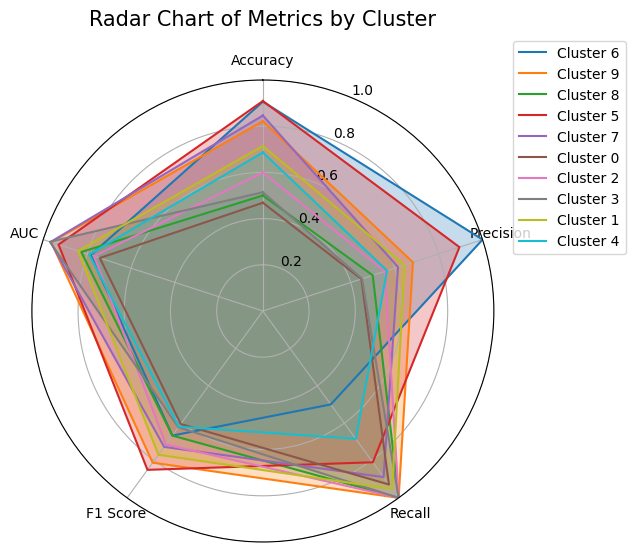

In [ ]:
def plot_radar_chart(results):
    # Metrics to be displayed on the radar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
    num_metrics = len(metrics)

    # Create a list of angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart

    # Initialize the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot each cluster's data
    for cluster, metrics_values in results.items():
        # Extract values in the same order as the metrics list
        values = [metrics_values[metric] for metric in metrics]
        values += values[:1]  # Close the radar chart

        ax.plot(angles, values, label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.25)

    # Set up the radar chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title('Radar Chart of Metrics by Cluster', size=15, y=1.1)

    # Add legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Display the radar chart
    plt.show()

# Call the function with the results variable
plot_radar_chart(results)